In [1]:
from utils.datamodule import AffWildDataset, AffWildDataModule
from utils import imdenormalize, impt2np
from tqdm import tqdm
import mipkit
DATA_DIR = '/home/lab/congvm/Affwild2'
BATCH_SIZE = 32

In [37]:
EMOTION_MAP = {
    -1: "Ignored",
    0: "Neutral",
    1: "Anger",
    2: "Disgust",
    3: "Fear",
    4: "Happiness",
    5: "Sadness",
    6: "Surprise",
    7: "Other",
}


In [2]:
data_module = AffWildDataModule(data_dir=DATA_DIR, batch_size=BATCH_SIZE)
data_module.setup(stage="fit")

# train_dataloader = data_module.train_dataloader()
# for batch in tqdm(train_dataloader):
#     pass

val_dataloader = data_module.val_dataloader()
for batch in tqdm(val_dataloader):
    pass


100%|██████████| 840/840 [00:11<00:00, 72.06it/s]


* mean: -0.5681236386299133
* max: 2.552854061126709
* min: -2.1179039478302
* median: -0.9677870273590088
* shape: (224, 224, 3)
* dtype: float32
----------
* mean: 81.38564918154762
* max: 254
* min: 0
* median: 59.0
* shape: (224, 224, 3)
* dtype: uint8
----------
Valence:  -0.08699999749660492
Arousal: 0.4399999976158142
Expression: Ignored
Action Unit:  [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.]


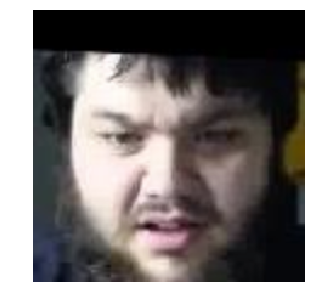

In [40]:
image_index = 8
img_arr = impt2np(batch["img_arr"], image_index=image_index)
denorm_img_arr = imdenormalize(
    img_arr, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), scale_255=True
)
mipkit.show_stats(img_arr)
print("-" * 10)
mipkit.show_stats(denorm_img_arr)
print("-" * 10)
print("Valence: ", batch["valence"][image_index].item())
print("Arousal:", batch["arousal"][image_index].item())
print("Expression:", EMOTION_MAP[batch["exp"][image_index].item()])
print("Action Unit: ", batch["au"][image_index].numpy())

mipkit.show_image(denorm_img_arr, figsize=(5, 5))
